In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# load csv
csv_file = 'Resources/crypto_data.csv'
crypto_df = pd.read_csv(csv_file)

print(len(crypto_df))
crypto_df.head()

1252


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


## Data Preparation

In [3]:
# filter for currencies currently being traded ("IsTrading" == True)
crypto_df = crypto_df[crypto_df["IsTrading"] == True]

print(len(crypto_df))
crypto_df.head()

1144


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# once we've done this, drop "IsTrading" column
crypto_df = crypto_df.drop(columns="IsTrading")
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [5]:
# remove all rows with at least one null value
crypto_df = crypto_df.dropna()

# double check for nulls
crypto_df.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [6]:
# check dtypes and adjust accordingly
crypto_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [7]:
crypto_df["TotalCoinSupply"] = crypto_df["TotalCoinSupply"].astype('float')
crypto_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [8]:
# filter for cryptocurrencies that have been mined ("TotalCoinSupply" > 0)
crypto_df = crypto_df[crypto_df["TotalCoinSupply"]> 0]

print(len(crypto_df))
crypto_df.head()

637


,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,2.100000e+07
9,LTC,Litecoin,Scrypt,PoW,6.303924e+07,8.400000e+07


In [10]:
# store "CoinName" as 'labels' to help visualize t-SNE
labels = pd.DataFrame(crypto_df["CoinName"]).reset_index(drop=True)
len(labels)

637

In [11]:
# coin names don't contribute to data analysis - delete "CoinName" and "Unnamed: 0"
crypto_df = crypto_df.drop(columns=["CoinName", "Unnamed: 0"])

print(crypto_df.shape)
crypto_df.head()

(637, 4)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
5,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,SHA-256,PoW,1.792718e+07,2.100000e+07
9,Scrypt,PoW,6.303924e+07,8.400000e+07


In [12]:
# convert "Algorithm" and "ProofType" into numerical data by creating dummy variables
crypto_dummies = pd.get_dummies(crypto_df, columns=["Algorithm", "ProofType"])

print(crypto_dummies.shape)
crypto_dummies.head()

(637, 105)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,6.303924e+07,8.400000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# standardize data (columns with larger values won't unduly influence outcome)
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(crypto_dummies)

## Dimensionality Reduction

In [14]:
# with PCA, preserve 90% of explained variance in dimensionality reduction
pca = PCA(n_components=0.90)

# get principal components
crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca

array([[-1.60261243e-01, -1.18288467e+00, -5.50082925e-01, ...,
        -1.37251441e-12, -2.68963710e-11,  2.27657973e-12],
       [-1.45855648e-01, -1.18092169e+00, -5.50502557e-01, ...,
        -1.37221492e-12, -2.68957098e-11,  2.27672511e-12],
       [ 4.06774086e-01, -1.93473203e+00, -6.22301988e-01, ...,
        -7.58509846e-14, -2.80032836e-14,  2.05295105e-14],
       ...,
       [-2.01116114e-01,  2.21890263e+00,  3.76253693e-01, ...,
         8.41508766e-15,  6.37175968e-14, -2.23705486e-14],
       [-3.43673218e-01,  1.92341705e+00,  3.36220602e-01, ...,
        -1.37124812e-12, -2.68975846e-11,  2.27580777e-12],
       [-5.00068379e-02, -8.48397044e-01, -2.66629377e-01, ...,
        -1.36867423e-12, -2.68984955e-11,  2.27915046e-12]])

In [15]:
# transform PCA data into df
pca_df = pd.DataFrame(data=crypto_pca)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-0.160261,-1.182885,-0.550083,-4.156398e-07,-7.914660e-09,2.748724e-10,-3.341870e-10,-4.478361e-10,0.015750,-1.162458,...,-1.620256e-12,5.836535e-13,1.370309e-12,-4.513903e-13,-8.511947e-13,3.695317e-13,1.457763e-12,-1.372514e-12,-2.689637e-11,2.276580e-12
1,-0.145856,-1.180922,-0.550503,-4.156399e-07,-7.914661e-09,2.748724e-10,-3.341870e-10,-4.478362e-10,0.014381,-1.164725,...,-1.620368e-12,5.834845e-13,1.370584e-12,-4.518363e-13,-8.513545e-13,3.692294e-13,1.457965e-12,-1.372215e-12,-2.689571e-11,2.276725e-12
2,0.406774,-1.934732,-0.622302,-5.916145e-07,-1.126562e-08,3.912574e-10,-4.756922e-10,-6.374669e-10,-0.029898,-0.753670,...,1.266808e-13,-8.244438e-15,4.861930e-14,-6.815547e-14,-5.847214e-14,-5.371994e-14,1.978493e-15,-7.585098e-14,-2.800328e-14,2.052951e-14
3,-0.246677,1.406204,0.188435,2.214585e-07,4.217059e-09,-1.464605e-10,1.780717e-10,2.386245e-10,-0.011565,0.155303,...,1.448865e-14,-8.999251e-15,1.729787e-14,-9.616923e-15,-8.427045e-15,-3.681682e-15,3.712037e-15,-8.559564e-15,-2.142497e-14,-7.439344e-15
4,-0.318125,1.058161,-0.011589,1.120947e-07,2.134552e-09,-7.413783e-11,9.014487e-11,1.207944e-10,0.007188,-0.363163,...,-1.618034e-12,5.840145e-13,1.370651e-12,-4.534519e-13,-8.517732e-13,3.661816e-13,1.459518e-12,-1.373239e-12,-2.689615e-11,2.277277e-12


In [16]:
# fetch explained variance
pca.explained_variance_ratio_

array([0.02152743, 0.02009212, 0.01913484, 0.01907757, 0.01907757,
       0.01907757, 0.01907757, 0.01907757, 0.01904019, 0.01699986,
       0.01628465, 0.0152066 , 0.01509449, 0.01489954, 0.01450315,
       0.01330357, 0.01188322, 0.01184387, 0.01126097, 0.01102736,
       0.01032707, 0.00980719, 0.00976109, 0.00971429, 0.0096818 ,
       0.00966213, 0.00964211, 0.00960745, 0.00959743, 0.00958471,
       0.00958399, 0.00958399, 0.00958333, 0.00957795, 0.00957446,
       0.00956887, 0.00956887, 0.00956887, 0.00956887, 0.00956332,
       0.00956018, 0.00955826, 0.00955726, 0.00955386, 0.00955381,
       0.00955305, 0.00955246, 0.00955039, 0.00954555, 0.00953878,
       0.00953878, 0.00953878, 0.00953878, 0.00953878, 0.00953878,
       0.00953878, 0.00953878, 0.00953878, 0.00953878, 0.00953878,
       0.00953878, 0.00953878, 0.00953878, 0.00953878, 0.00953878,
       0.00953878, 0.00953878, 0.00953878, 0.00953878, 0.00953878,
       0.00953878, 0.00953878, 0.00953878, 0.00953878, 0.00953

In [17]:
# expected sum is 0.90
arr = pca.explained_variance_ratio_
arr_sum = 0
for i in range(0, len(arr)):
    arr_sum = arr_sum + arr[i]
    
print(f"Sum: {arr_sum}")

Sum: 0.9023046301654124


with 80 principal components, we've preserved approx. 90% of the explained variance

### further reduce dataset dimensions with t-SNE

In [18]:
# initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [19]:
# run t-SNE on principal components (in our case, pca_df)
tsne_features = tsne.fit_transform(pca_df)
tsne_features.shape

/Users/dan/opt/anaconda3/envs/PythonData/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(637, 2)

In [20]:
# prepare to plot t-SNE output
# first column of transformed features
x = tsne_features[:,0]

# second column of transformed features
y = tsne_features[:,1]

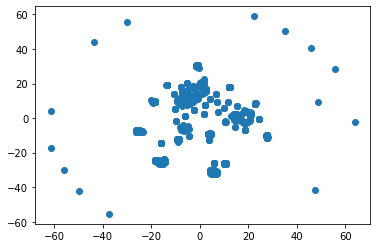

In [21]:
# plot results
plt.scatter(x, y)
plt.show()

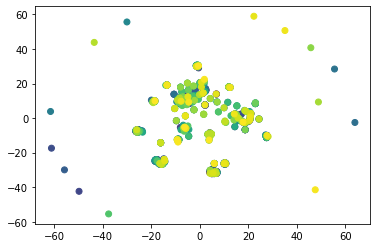

In [22]:
# visualize clusters in color
plt.scatter(x, y, c=labels.index)
plt.show()

## Cluster Analysis with k-Means

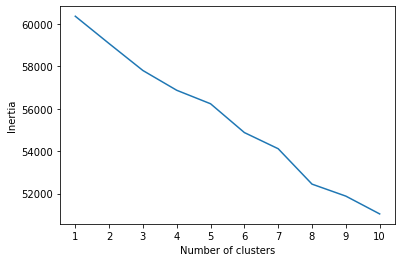

In [24]:
inertia = []
k = list(range(1, 11))

# find best value for k
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(pca_df)
    inertia.append(km.inertia_)

# plot elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

based on the lack of elbow in our graph and not finding any distinct clusters in our previous visualization, I would recommend that the cryptocurrencies not be clustered together